### Imports and data cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import signal
from scipy.signal import savgol_filter
from sklearn.metrics import mean_squared_error, r2_score
from IPython import display
import time
import IPython
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Text, Button
from IPython.display import display
import matplotlib.pyplot as plt

### Welcome to the Linear Regression Tool! Click "Run All" and Scroll to the Bottom to Start!

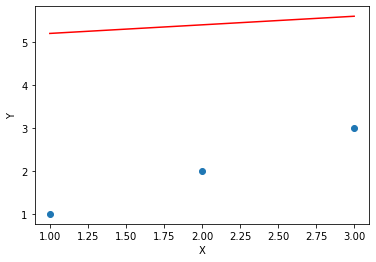

HTML(value='Please rerun the bottom cell to try other options')

In [2]:
# User cell
# Getting x,y input, displaying the points
x_inp_text_box = Text(value='', placeholder='x1,x2, .....', description='X')
y_inp_text_box = Text(value='', placeholder='y1,y2, .....', description='Y')
display = Button(description='Click to display x,y on plot')

def check_length(x_values, y_values):
        if len(x_values) != len(y_values):
            if (len(x_values) > len(y_values)):
                diff = len(x_values) - len(y_values)
                data_set = 'y'
            else:
                diff = len(y_values) - len(x_values)
                data_set = 'x'
            error_msg = widgets.HTML(value='Please add ' + str(diff) + ' more ' + data_set + ' value(s)')
            IPython.display.display(error_msg)
            time.sleep(3)
            error_msg.layout.visibility = 'hidden'
            return False
        else:
            return True
        
def is_float(string):
    if string.replace(".", "").isdigit():
        return True
    else:
        error_msg = widgets.HTML(value='Please enter valid floats or integers; do not put spaces between list commas')
        IPython.display.display(error_msg)
        time.sleep(3)
        error_msg.layout.visibility = 'hidden'
        return False
    
def is_integer(string):
    if string.isdigit():
        return True
    else:
        error_msg = widgets.HTML(value='Please enter valid floats or integers; do not put spaces between list commas')
        IPython.display.display(error_msg)
        time.sleep(3)
        error_msg.layout.visibility = 'hidden'
        return False

def is_empty(string):
    if (string == ''):
        error_msg = widgets.HTML(value='Please add valid x and y values')
        IPython.display.display(error_msg)
        time.sleep(3)
        error_msg.layout.visibility = 'hidden'
        return True
    else:
        return False

def on_display_click(b):
    x_input = x_inp_text_box.value
    y_input = y_inp_text_box.value
    # parse the data and create a plot
    x_values = x_input.split(',')
    y_values = y_input.split(',')
    if not check_length(x_values, y_values):
        return
    
    for item in x_values:
        if not is_float(item) or not is_integer(item):
            return
        
    for item in y_values:
        if not is_float(item) or not is_integer(item):
            return

    data = [(float(x_values[i]), float(y_values[i]))
            for i in range(min(len(x_values), len(y_values)))]
      
    plt.clf()
    plt.scatter(*zip(*data))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    

display.on_click(on_display_click)
input_box_x_y = HBox([x_inp_text_box, y_inp_text_box])


# Getting w, b, displaying the points and the line given by eqn y = mx+b
w_inp_text_box = Text(value='', placeholder='slope value', description='w')
b_inp_text_box = Text(value='', placeholder='y-intercept value', description='b')
plot = Button(description='Click to plot x,y,input linear function')
def on_plot_click(b):
    x_input = x_inp_text_box.value
    y_input = y_inp_text_box.value

    #??
    if not is_float(w_inp_text_box.value) or not is_float(b_inp_text_box.value):
        return
    
    w_input = float(w_inp_text_box.value)
    b_input = float(b_inp_text_box.value)
    # parse the data and create a plot of the points
    x_values = x_input.split(',')
    
    for item in x_values:
        if not is_float(item) or not is_integer(item):
            return
        
    x_values = [float(i) for i in x_values]
        
    

    y_values = y_input.split(',')

    for item in y_values:
        if not is_float(item) or not is_integer(item):
            return
    y_values = [float(i) for i in y_values]
    
    if not check_length(x_values, y_values):
        return
    data = [(float(x_values[i]), float(y_values[i]))
            for i in range(min(len(x_values), len(y_values)))]

    IPython.display.clear_output(wait = False)
    
    plt.clf()
    plt.scatter(*zip(*data))

    # plot a line with the provided equation
    x = x_values
    y = [((w_input * int(i))+b_input) for i in x_values]
    plt.plot(x, y, '-r')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    

    msg = widgets.HTML(value='Please rerun the bottom cell to try other options')
    IPython.display.display(msg)
    time.sleep(3)
    msg.layout.visibility = 'hidden'  

    

plot.on_click(on_plot_click)
input_box_w_b = HBox([w_inp_text_box, b_inp_text_box])

# Getting alpha, num_iters, running linear regression
alpha_inp_text_box = Text(value='', placeholder='learning rate', description='alpha')
num_iters_inp_text_box = Text(value='', placeholder='number of iterations to run linear regression for', description='Number of iterations')
run_lin_reg = Button(description='Click to run linear regression')

def run_lin_regression(b):
    out = widgets.Output()
    if (is_empty(x_inp_text_box.value) or is_empty(y_inp_text_box.value) or not is_float(alpha_inp_text_box.value) or not is_integer(num_iters_inp_text_box.value)):
        return
    x_input = x_inp_text_box.value
    y_input = y_inp_text_box.value
    alpha_input = float(alpha_inp_text_box.value)
    num_iters_input = int(num_iters_inp_text_box.value)
    # parse the data and create a plot of the points
    x_values = x_input.split(',')
    x_values = [int(i) for i in x_values]
    y_values = y_input.split(',')
    y_values = [int(i) for i in y_values]
    if not check_length(x_values, y_values):
        return

    step_size = 0.05 * num_iters_input
    
    w = 0
    b = 0

    for i in range(num_iters_input):
        dJ_dw = 0
        dJ_db = 0
        for j in range(len(x_values)):
            dJ_dw = dJ_dw + (1/len(x_input)) * (w*x_values[j] + b - y_values[j])*x_values[j]
            dJ_db = dJ_db + (1/len(x_input))*(w*x_values[j] + b - y_values[j])
        
        w = w - alpha_input*dJ_dw
        b = b - alpha_input*dJ_db
        y_pred = np.empty([len(x_values), 1])
            
        for k in range(len(x_values)):
            y_pred[k] = w*x_values[k] + b

        if i % step_size == 0:
            plt.clf()
            plt.scatter(x_values, y_values, color='b')
            plt.plot(x_values, y_pred, color='k')
            IPython.display.display(plt.gcf())
            time.sleep(2)
            IPython.display.clear_output(wait = False)

    #why
    msg = widgets.HTML(value='Please rerun the bottom cell to try other options')
    IPython.display.display(msg)
    time.sleep(3)
    msg.layout.visibility = 'hidden'   
        
            
run_lin_reg.on_click(run_lin_regression)
input_box_alpha_num_iters = HBox([alpha_inp_text_box, num_iters_inp_text_box])



output_box = VBox([input_box_x_y, display, input_box_w_b, plot, input_box_alpha_num_iters, run_lin_reg])
output_box